# Crosstalk effect on Multiple circuit execution with nisq-grover circuits

rum

2021 / 04 / 26


In [1]:
from toffoli_circuit import toffoli_circuit
from grover_experiments import multi_exec, results
from qiskit.tools import job_monitor
from qiskit.visualization import plot_histogram

In [2]:
# prepare grover circuits

ts1 = toffoli_circuit(mode='swap', measure=True, repeat=1)
qb1 = [ts1.qregs[0][0], ts1.qregs[0][1], ts1.qregs[0][2]]

ts2 = toffoli_circuit(mode='swap', measure=False, repeat=1)
qb2 = [ts2.qregs[0][0], ts2.qregs[0][1], ts2.qregs[0][2]]

ts3 = toffoli_circuit(mode='swap', measure=False, repeat=1)
qb3 = [ts3.qregs[0][0], ts3.qregs[0][1], ts3.qregs[0][2]]

ts4 = toffoli_circuit(mode='swap', measure=False, repeat=1)
qb4 = [ts4.qregs[0][0], ts4.qregs[0][1], ts4.qregs[0][2]]

ts5 = toffoli_circuit(mode='swap', measure=False, repeat=1)
qb5 = [ts5.qregs[0][0], ts5.qregs[0][1], ts5.qregs[0][2]]

## Run on IBM Q  Toronto

In [3]:
backend_name = 'ibmq_toronto'
shots = 1000
num_trial = 100
il1 = {qb1[0]: 12, qb1[1]: 13, qb1[2]: 14}
il2 = {qb2[0]: 4,  qb2[1]: 7,  qb2[2]: 10}
il3 = {qb3[0]: 5,  qb3[1]: 8,  qb3[2]: 11}
il4 = {qb4[0]: 15, qb4[1]: 18, qb4[2]: 21}
il5 = {qb5[0]: 16, qb5[1]: 19, qb5[2]: 22}

In [4]:
# run on device
job_sim1, job1, qc1= multi_exec(backend_name=backend_name, experiments=[(ts1, il1)], num_trial=num_trial, shots=shots, return_qc=True)
job_id1 = job1.job_id()
print(job_id1)

6086abe307a9f83822b4af1b


In [5]:
# run on device
job_sim2, job2, qc2= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2)], num_trial=num_trial, shots=shots, return_qc=True)
job_id2 = job2.job_id()
print(job_id2)

ibmqfactory.load_account:WARNING:2021-04-26 21:02:46,295: Credentials are already in use. The existing account in the session will be replaced.


6086abf9b369efb13671fff2


In [6]:
# run on device
job_sim3, job3, qc3= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2), (ts3, il3)], num_trial=num_trial, shots=shots, return_qc=True)
job_id3 = job3.job_id()
print(job_id3)

ibmqfactory.load_account:WARNING:2021-04-26 21:03:08,473: Credentials are already in use. The existing account in the session will be replaced.


6086ac0d2c784538b2cded6c


In [7]:
# run on device
job_sim4, job4, qc4= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2), (ts3, il3), (ts4, il4)], num_trial=num_trial, shots=shots, return_qc=True)
job_id4 = job4.job_id()
print(job_id4)

ibmqfactory.load_account:WARNING:2021-04-26 21:03:28,925: Credentials are already in use. The existing account in the session will be replaced.


6086ac271c20a1ee0d4e724a


In [8]:
# run on device
job_sim5, job5, qc5= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2), (ts3, il3), (ts4, il4), (ts5, il5)], num_trial=num_trial, shots=shots, return_qc=True)
job_id5 = job5.job_id()
print(job_id5)

ibmqfactory.load_account:WARNING:2021-04-26 21:03:56,265: Credentials are already in use. The existing account in the session will be replaced.


6086ac40a8aa6b813ec35139


In [9]:
# Show the job status
job_monitor(job1)

Job Status: job has successfully run


In [10]:
print(qc1)

      ┌───┐                            ┌───┐           ┌───┐┌─────┐┌───┐┌─┐   
q0_0: ┤ X ├──■─────────────────────■───┤ T ├───────────┤ X ├┤ TDG ├┤ X ├┤M├───
      ├───┤┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐     ┌───┐└─┬─┘└┬───┬┘└─┬─┘└╥┘┌─┐
q0_1: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├──■──┤ X ├──■───┤ T ├───■───╫─┤M├
      ├───┤└───┘└─────┘└─┬─┘└───┘└───┘└─────┘┌─┴─┐└─┬─┘┌───┐ ├───┤  ┌─┐  ║ └╥┘
q0_2: ┤ X ├──────────────■───────────────────┤ X ├──■──┤ T ├─┤ H ├──┤M├──╫──╫─
      └───┘                                  └───┘     └───┘ └───┘  └╥┘  ║  ║ 
c1: 3/═══════════════════════════════════════════════════════════════╩═══╩══╩═
                                                                     2   0  1 


In [11]:
# get the result
counts_sim1, counts1 = results(backend_name=backend_name, job_sim=job_sim1, job_id=job_id1, num_trial=num_trial)

ibmqfactory.load_account:WARNING:2021-04-26 21:05:35,566: Credentials are already in use. The existing account in the session will be replaced.


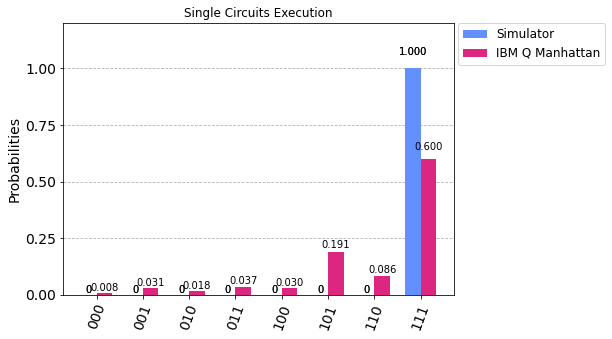

In [12]:
# # show plots
plot_histogram([counts_sim1, counts1], title='Single Circuits Execution', legend=['Simulator', 'IBM Q Manhattan'])

## 2 circuits execution

In [13]:
# # run on device
# job_sim2, job2, qc2= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2)], num_trial=num_trial, shots=shots, return_qc=True)
# job_id2 = job2.job_id()
# print(job_id2)

In [14]:
# Show the job status
job_monitor(job2)

Job Status: job has successfully run


In [15]:
print(qc2)

      ┌───┐                            ┌───┐           ┌───┐┌─────┐┌───┐     »
q0_0: ┤ X ├──■─────────────────────■───┤ T ├───────────┤ X ├┤ TDG ├┤ X ├─────»
      ├───┤┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐     ┌───┐└─┬─┘└┬───┬┘└─┬─┘     »
q0_1: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├──■──┤ X ├──■───┤ T ├───■───────»
      ├───┤└───┘└─────┘└─┬─┘└───┘└───┘└─────┘┌─┴─┐└─┬─┘┌───┐ ├───┤  ┌─┐      »
q0_2: ┤ X ├──────────────■───────────────────┤ X ├──■──┤ T ├─┤ H ├──┤M├──────»
      ├───┤                            ┌───┐ └───┘     ├───┤┌┴───┴┐ └╥┘ ┌───┐»
q1_0: ┤ X ├──■─────────────────────■───┤ T ├───────────┤ X ├┤ TDG ├──╫──┤ X ├»
      ├───┤┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐     ┌───┐└─┬─┘└┬───┬┘  ║  └─┬─┘»
q1_1: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├──■──┤ X ├──■───┤ T ├───╫────■──»
      ├───┤└───┘└─────┘└─┬─┘└───┘└───┘└─────┘┌─┴─┐└─┬─┘┌───┐ ├───┤   ║       »
q1_2: ┤ X ├──────────────■───────────────────┤ X ├──■──┤ T ├─┤ H ├───╫───────»
      └───┘                                  └───┘  

In [16]:
# get the result
counts_sim2, counts2 = results(backend_name=backend_name, job_sim=job_sim2, job_id=job_id2, num_trial=num_trial)

ibmqfactory.load_account:WARNING:2021-04-26 21:06:53,641: Credentials are already in use. The existing account in the session will be replaced.


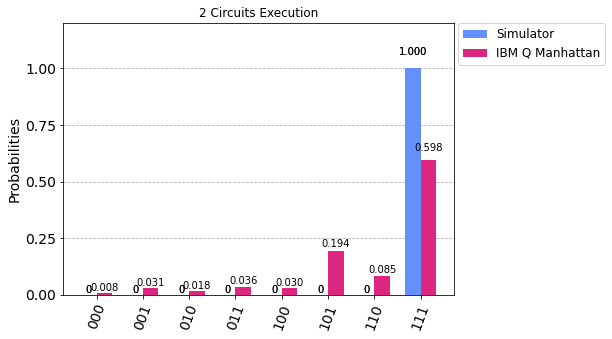

In [17]:
# # show plots
plot_histogram([counts_sim2, counts2], title='2 Circuits Execution', legend=['Simulator', 'IBM Q Manhattan'])

## 3 Circuits execution

In [18]:
# # run on device
# job_sim3, job3, qc3= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2), (ts3, il3)], num_trial=num_trial, shots=shots, return_qc=True)
# job_id3 = job3.job_id()
# print(job_id3)

In [19]:
# Show the job status
job_monitor(job3)

Job Status: job has successfully run


In [20]:
print(qc3)

      ┌───┐                            ┌───┐           ┌───┐┌─────┐┌───┐     »
q0_0: ┤ X ├──■─────────────────────■───┤ T ├───────────┤ X ├┤ TDG ├┤ X ├─────»
      ├───┤┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐     ┌───┐└─┬─┘└┬───┬┘└─┬─┘     »
q0_1: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├──■──┤ X ├──■───┤ T ├───■───────»
      ├───┤└───┘└─────┘└─┬─┘└───┘└───┘└─────┘┌─┴─┐└─┬─┘┌───┐ ├───┤  ┌─┐      »
q0_2: ┤ X ├──────────────■───────────────────┤ X ├──■──┤ T ├─┤ H ├──┤M├──────»
      ├───┤                            ┌───┐ └───┘     ├───┤┌┴───┴┐ └╥┘ ┌───┐»
q1_0: ┤ X ├──■─────────────────────■───┤ T ├───────────┤ X ├┤ TDG ├──╫──┤ X ├»
      ├───┤┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐     ┌───┐└─┬─┘└┬───┬┘  ║  └─┬─┘»
q1_1: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├──■──┤ X ├──■───┤ T ├───╫────■──»
      ├───┤└───┘└─────┘└─┬─┘└───┘└───┘└─────┘┌─┴─┐└─┬─┘┌───┐ ├───┤   ║       »
q1_2: ┤ X ├──────────────■───────────────────┤ X ├──■──┤ T ├─┤ H ├───╫───────»
      ├───┤                            ┌───┐ └───┘  

In [21]:
# get the result
counts_sim3, counts3 = results(backend_name=backend_name, job_sim=job_sim3, job_id=job_id3, num_trial=num_trial)

ibmqfactory.load_account:WARNING:2021-04-26 21:07:14,533: Credentials are already in use. The existing account in the session will be replaced.


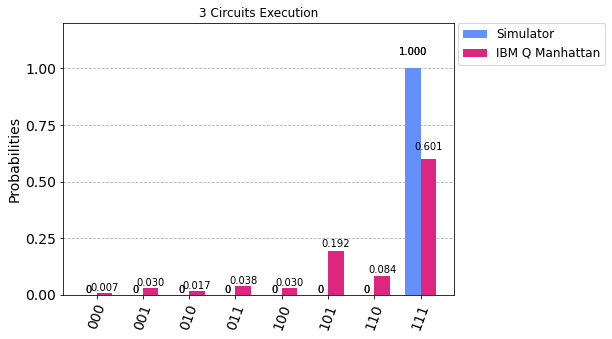

In [22]:
# # show plots
plot_histogram([counts_sim3, counts3], title='3 Circuits Execution', legend=['Simulator', 'IBM Q Manhattan'])

## 4 circuit execution

In [23]:
# # run on device
# job_sim4, job4, qc4= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2), (ts3, il3), (ts4, il4)], num_trial=num_trial, shots=shots, return_qc=True)
# job_id4 = job4.job_id()
# print(job_id4)

In [24]:
# Show the job status
job_monitor(job4)

Job Status: job has successfully run


In [25]:
print(qc4)

      ┌───┐                            ┌───┐           ┌───┐┌─────┐┌───┐     »
q0_0: ┤ X ├──■─────────────────────■───┤ T ├───────────┤ X ├┤ TDG ├┤ X ├─────»
      ├───┤┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐     ┌───┐└─┬─┘└┬───┬┘└─┬─┘     »
q0_1: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├──■──┤ X ├──■───┤ T ├───■───────»
      ├───┤└───┘└─────┘└─┬─┘└───┘└───┘└─────┘┌─┴─┐└─┬─┘┌───┐ ├───┤  ┌─┐      »
q0_2: ┤ X ├──────────────■───────────────────┤ X ├──■──┤ T ├─┤ H ├──┤M├──────»
      ├───┤                            ┌───┐ └───┘     ├───┤┌┴───┴┐ └╥┘ ┌───┐»
q1_0: ┤ X ├──■─────────────────────■───┤ T ├───────────┤ X ├┤ TDG ├──╫──┤ X ├»
      ├───┤┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐     ┌───┐└─┬─┘└┬───┬┘  ║  └─┬─┘»
q1_1: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├──■──┤ X ├──■───┤ T ├───╫────■──»
      ├───┤└───┘└─────┘└─┬─┘└───┘└───┘└─────┘┌─┴─┐└─┬─┘┌───┐ ├───┤   ║       »
q1_2: ┤ X ├──────────────■───────────────────┤ X ├──■──┤ T ├─┤ H ├───╫───────»
      ├───┤                            ┌───┐ └───┘  

In [26]:
# get the result
counts_sim4, counts4 = results(backend_name=backend_name, job_sim=job_sim4, job_id=job_id4, num_trial=num_trial)

ibmqfactory.load_account:WARNING:2021-04-26 21:08:05,592: Credentials are already in use. The existing account in the session will be replaced.


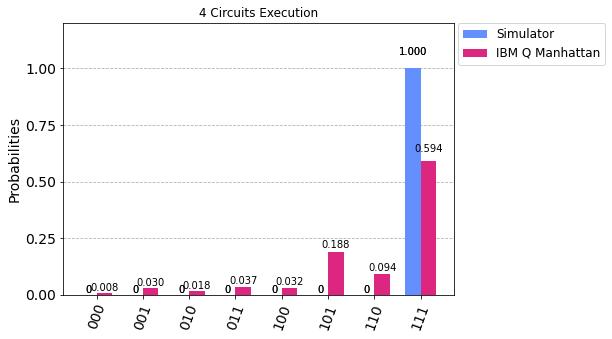

In [27]:
# # show plots
plot_histogram([counts_sim4, counts4], title='4 Circuits Execution', legend=['Simulator', 'IBM Q Manhattan'])

## 5 circuit execution

In [28]:
# # run on device
# job_sim5, job5, qc5= multi_exec(backend_name=backend_name, experiments=[(ts1, il1), (ts2, il2), (ts3, il3), (ts4, il4), (ts5, il5)], num_trial=num_trial, shots=shots, return_qc=True)
# job_id5 = job5.job_id()
# print(job_id5)

In [29]:
# Show the job status
job_monitor(job5)

Job Status: job has successfully run


In [30]:
print(qc5)

      ┌───┐                            ┌───┐           ┌───┐┌─────┐┌───┐     »
q0_0: ┤ X ├──■─────────────────────■───┤ T ├───────────┤ X ├┤ TDG ├┤ X ├─────»
      ├───┤┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐     ┌───┐└─┬─┘└┬───┬┘└─┬─┘     »
q0_1: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├──■──┤ X ├──■───┤ T ├───■───────»
      ├───┤└───┘└─────┘└─┬─┘└───┘└───┘└─────┘┌─┴─┐└─┬─┘┌───┐ ├───┤  ┌─┐      »
q0_2: ┤ X ├──────────────■───────────────────┤ X ├──■──┤ T ├─┤ H ├──┤M├──────»
      ├───┤                            ┌───┐ └───┘     ├───┤┌┴───┴┐ └╥┘ ┌───┐»
q1_0: ┤ X ├──■─────────────────────■───┤ T ├───────────┤ X ├┤ TDG ├──╫──┤ X ├»
      ├───┤┌─┴─┐┌─────┐┌───┐┌───┐┌─┴─┐┌┴───┴┐     ┌───┐└─┬─┘└┬───┬┘  ║  └─┬─┘»
q1_1: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├──■──┤ X ├──■───┤ T ├───╫────■──»
      ├───┤└───┘└─────┘└─┬─┘└───┘└───┘└─────┘┌─┴─┐└─┬─┘┌───┐ ├───┤   ║       »
q1_2: ┤ X ├──────────────■───────────────────┤ X ├──■──┤ T ├─┤ H ├───╫───────»
      ├───┤                            ┌───┐ └───┘  

In [31]:
# get the result
counts_sim5, counts5 = results(backend_name=backend_name, job_sim=job_sim5, job_id=job_id5, num_trial=num_trial)

ibmqfactory.load_account:WARNING:2021-04-26 21:08:56,173: Credentials are already in use. The existing account in the session will be replaced.


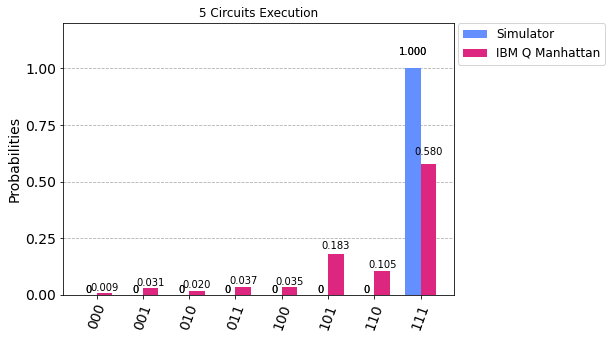

In [32]:
# # show plots
plot_histogram([counts_sim5, counts5], title='5 Circuits Execution', legend=['Simulator', 'IBM Q Manhattan'])

In [40]:
from jsd import jsd
from pst import pst

In [44]:
jsd1 = jsd(counts_sim1, counts1)
jsd2 = jsd(counts_sim2, counts2)
jsd3 = jsd(counts_sim3, counts3)
jsd4 = jsd(counts_sim4, counts4)
jsd5 = jsd(counts_sim5, counts5)

pst1 = pst(counts1, counts_sim1)
pst2 = pst(counts2, counts_sim2)
pst3 = pst(counts3, counts_sim3)
pst4 = pst(counts4, counts_sim4)
pst5 = pst(counts5, counts_sim5)

In [42]:
print(jsd1)
print(jsd2)
print(jsd3)
print(jsd4)
print(jsd5)

0.4049597314250998
0.40621893789851055
0.40403085842513153
0.40863965387746276
0.417070382423135


In [45]:
print(pst1)
print(pst2)
print(pst3)
print(pst4)
print(pst5)

0.6142
0.61207
0.61577
0.60797
0.59364
